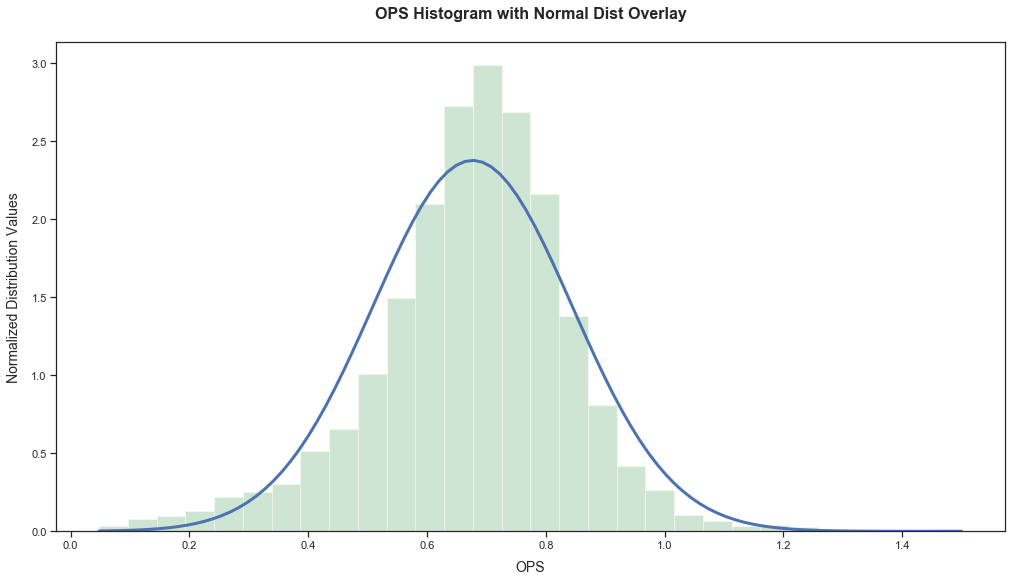

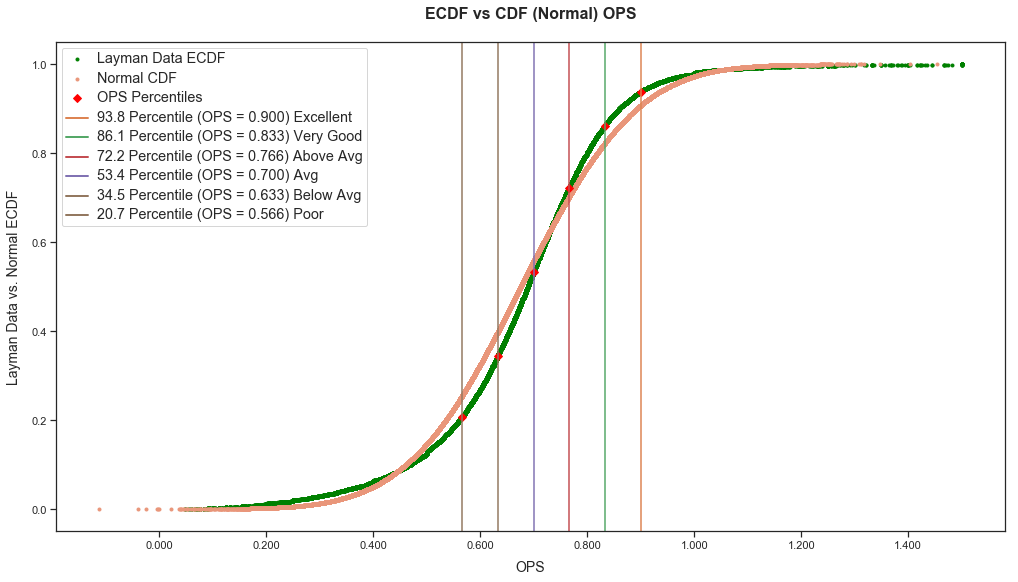




Two Tests for Null Hypothesis (H0) that Layman OPS population data is Normal


DAgostinos K^2 Test:

Statistics=1630.113, p=0.000
Data does not look normal (reject H0)


Anderson Darling Test:

Statistic: 217.140
15.000: 0.576, Data does not look normal (reject H0)
10.000: 0.656, Data does not look normal (reject H0)
5.000: 0.787, Data does not look normal (reject H0)
2.500: 0.918, Data does not look normal (reject H0)
1.000: 1.092, Data does not look normal (reject H0)





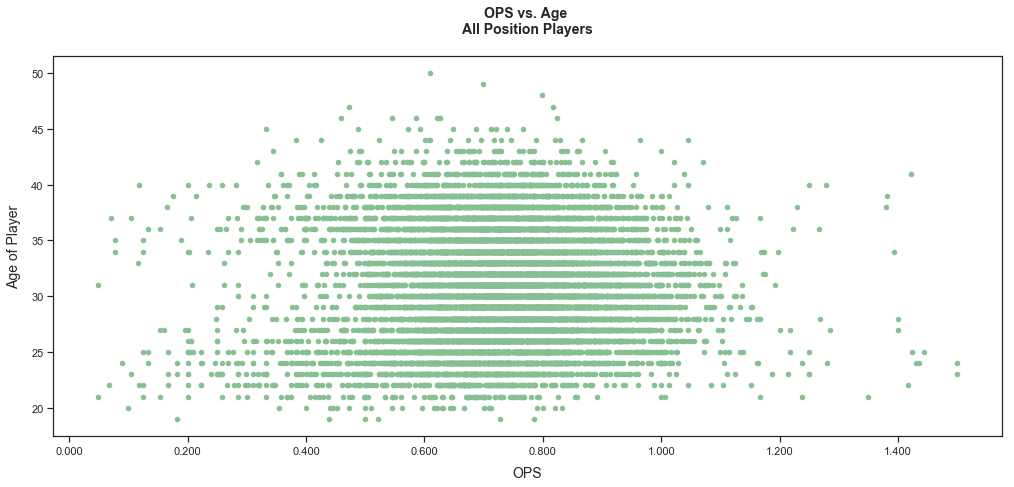

Pearson Correlationt Shows Weak Correlation 0.025


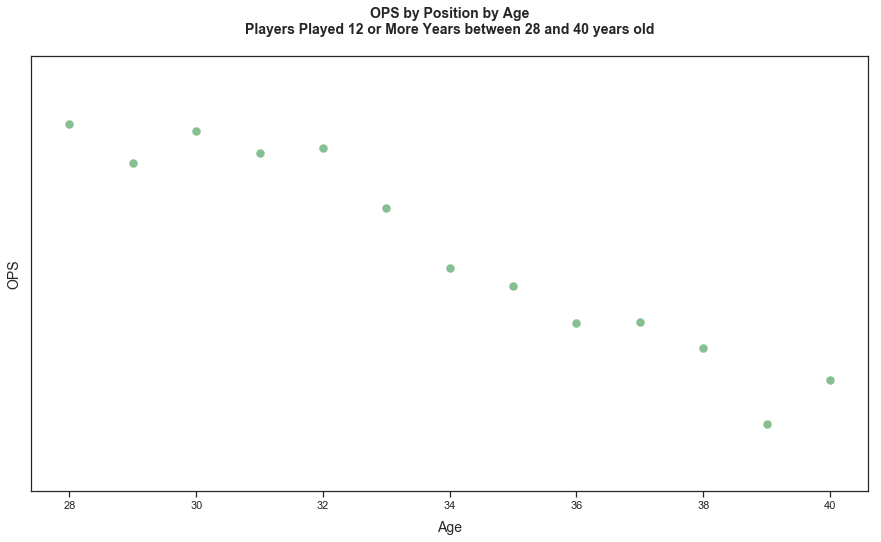

Pearson Correlation Shows Strong Negative Correlation -0.962


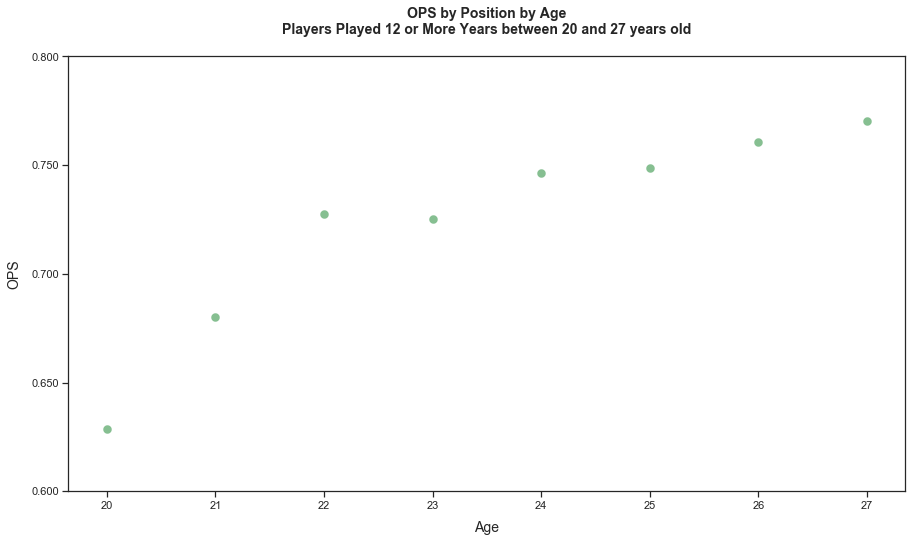

Pearson Correlation Shows Strong Positive Correlation 0.913


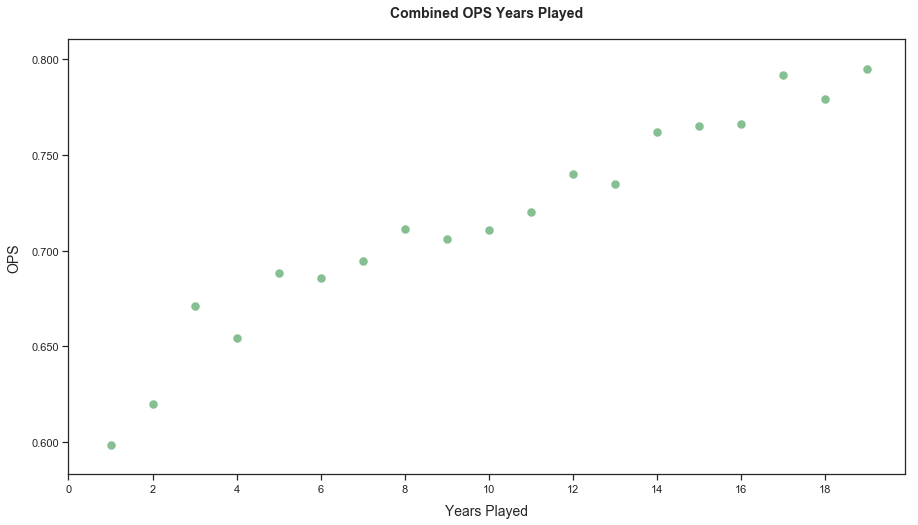

Pearson Correlation Shows Strong Positive Correlation 0.971


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 18 12:31:14 2019

@author: User
"""

import pandas as pd
import numpy as np
from datetime import datetime
import os.path
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import pylab as plb
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats 
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
import math

sns.set()
sns.set_style('ticks')

MIN_AT_BATS = 0
START_YEAR = 1954
END_YEAR = 2018
FSHZ = 17
START_DATE = datetime.strptime(str(START_YEAR)+'-01-01','%Y-%m-%d')
END_DATE = datetime.strptime(str(END_YEAR)+'-12-31','%Y-%m-%d')
LEGEND_PROPERTIES = {'weight':'bold'}
 

# set path for reading Lahman baseball statistics
path = 'C:\\Users\\User\\Documents\\PAUL\\Springboard\\core\\'
bigcontractsfile = 'BigPlayerContractsMLB.csv'

battingf = path + 'dfbatting_player_stats.csv'
dfbatting_player_stats = pd.read_csv(battingf,parse_dates=['debut','finalGame','birthdate'])

dfbatting_player_stats = dfbatting_player_stats[(dfbatting_player_stats['debut'] >= START_DATE) &
                                                (dfbatting_player_stats['finalGame'] <= END_DATE)]

# read in file of some of the bigger contracts in MLB from 1970's to current.
bigcontractsf = path + bigcontractsfile
dfbig = pd.read_csv(bigcontractsf)

# saves a excel file to disk from a dataframe
def save_stats_file(path, fn, df):
    stf = path + fn
    df.to_csv(stf, index=None, header=True)
    return True

#routine that calculates OPS, OBP and SLG and returns them to calling routine.
def calc_ops(df):    
    df['1B'] = df['H'] - ( df['2B'] + df['3B'] + df['HR'] )  
    df['TB'] =  df['1B'] + (df['2B'] * 2) + (df['3B'] * 3) + (df['HR'] * 4)                             
    df['SLG'] = df['TB'] / df['AB']
    df['OBP'] = ( df['H'] + df['BB'] + df['HBP'] ) / ( df['AB'] + df['BB'] + df['SF'] + df['HBP'] )                 
    df['OPS'] = df['OBP'] + df['SLG'] 
    df['AVG'] = df['H'] / df['AB']
    return  df

# ECDF function
def ecdf(data):
    x = np.sort(data)
    n = len(x)
    y = np.arange(1,n+1) / n
    return x,y    

#covariance calculation
def myCovariance(xs, ys):
    meanx = np.mean(xs)
    meany = np.mean(ys)
    n = len(xs)
    prod = (xs - meanx) * (ys - meany)
    cov = sum(prod) / n
    return cov

# given cov calc pearson corr
def myPearson_Corr(cov, xs, ys):
    stdx = np.std(xs)
    stdy = np.std(ys)
    pcorr = cov/(stdx * stdy)
    return pcorr

## 
#def Pearson_Corr(xs,ys):
#    xs = np.asarray(xs)
#    ys = np.asarray(ys)
#    meanx = np.mean(xs)
#    varx = np.var(xs)
#    meany = np.mean(ys)
#    vary = np.var(xs)    
#    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
#    return corr
#
#def pearson_r(x,y):
#    corr_mat = np.corrcoef(x,y)
#    return(corr_mat[0,1])

# set figure size
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = FSHZ
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

battingf = path + 'dfbatting_player_stats.csv'
dfbatting_player_stats = pd.read_csv(battingf,parse_dates=['debut','finalGame','birthdate'])

dfbatting_player_stats = dfbatting_player_stats[(dfbatting_player_stats['debut'] >= START_DATE) &
                                                (dfbatting_player_stats['finalGame'] <= END_DATE)]

df = dfbatting_player_stats
## read in file of some of the bigger contracts in MLB from 1970's to current.
#bigcontractsf = path + bigcontractsfile
#dfbig = pd.read_csv(bigcontractsf)
#
#############################################################################################################
#
#  plot the histogram from layman data against the normal distribution and layman ECDF against the norm CDF
#
#############################################################################################################
# 
# histogram wiht normal distribution with layman mean and standard deviation

data = df[(df['OPS'] <= 1.5) & (df['OPS'] > 0.0)]
data = np.array(data.OPS)
mu = np.mean(data)
sigma = np.std(data)
_ = plt.hist(data, bins=30, alpha=0.4, density=True, color='#86bf91')
x = np.linspace(min(data), max(data), 100)
y = scipy.stats.norm.pdf(x, mu, sigma)
_ = plt.plot(x, y, linewidth = 3)
_ = plt.title('OPS Histogram with Normal Dist Overlay\n',weight='bold', size=16)
_ = plt.xlabel('OPS', labelpad=10, size=14)
_ = plt.ylabel('Normalized Distribution Values', labelpad=10, size = 14)
plt.show()

# ECDF and norm CDF
x_ops, y_ops = ecdf(data)
mu = np.mean(x_ops)
sigma = np.std(x_ops)
sample = np.random.normal(mu, sigma, size=100000)
x_n, y_n = ecdf(sample)
ptiles = np.array([20.7,34.5,53.4,72.2,86.1,93.8])
ptiles_vals = np.percentile(x_ops,ptiles)
_ = plt.plot(x_ops,y_ops,marker='.',linestyle='none',color='green', label='Layman Data ECDF')
_ = plt.plot(x_n, y_n, marker='.',linestyle='none', label = 'Normal CDF',color='darksalmon')
_ = plt.plot(ptiles_vals, ptiles/100,marker='D',color='red',linestyle='none', label='OPS Percentiles')
_ = plt.title('ECDF vs CDF (Normal) OPS\n',weight='bold', size=16)
_ = plt.xlabel('OPS', labelpad=10, size=14)
_ = plt.ylabel('Layman Data vs. Normal ECDF', labelpad=10, size = 14)
ptiles_str =  [str( '%1.3f' % ptiles_vals[i] ) for i in range(0,len(ptiles))]
ptiles_leg = [str(ptiles[i]) + ' Percentile (OPS = ' + ptiles_str[i] + ')' for i in range(0,len(ptiles))]
plb.axvline(ptiles_vals[5],c='C1',label=ptiles_leg[5] + ' Excellent', color='#ff9999')
plb.axvline(ptiles_vals[4],c='C2',label=ptiles_leg[4] + ' Very Good', color='#66b3ff')
plb.axvline(ptiles_vals[3],c='C3',label=ptiles_leg[3] + ' Above Avg', color='#99ff99')
plb.axvline(ptiles_vals[2],c='C4',label=ptiles_leg[2] + ' Avg', color='#ffcc99')
plb.axvline(ptiles_vals[1],c='C5',label=ptiles_leg[1] + ' Below Avg', color='#66aa99')
plb.axvline(ptiles_vals[0],c='C5',label=ptiles_leg[0] + ' Poor', color='#557799')
leg = plt.legend()
plt.xticks(np.arange(.000,1.600,.200))
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(2)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('large')
plt.show()

# perform a number of tests on layman population OPS data
print('\n\n')
print('Two Tests for Null Hypothesis (H0) that Layman OPS population data is Normal\n\n')
# D'Agostinos K^2 Test
stat, p = normaltest(data)
print('D''Agostinos K^2 Test:\n')
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p < alpha:
    print("Data does not look normal (reject H0)")
else:
    print("Data looks normal (fail to reject H0)")
print('\n')
# Anderson Darling test
result = anderson(data)
print('Anderson Darling Test:\n')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, Data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, Data does not look normal (reject H0)' % (sl, cv))
print('\n\n')

#
#############################################################################################################
#
#  scatter plots for various cross sections of data looking for a good Pearson Correlation
#
#############################################################################################################
#
# Scatter plot for players playing for 12 or more years by OPS vs Age
dfplot = df[ (df['OPS'] > .0) & (df['OPS'] <= 1.5) & (df['age'] >=  0) & (df['years_played'] >= 12) ][['OPS','age','years_played']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(FSHZ,7),color='#86bf91')
ax.set_title('OPS vs. Age \nAll Position Players\n', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, size=14)
ax.set_ylabel("Age of Player", labelpad=10, size=14)
for tick in ax.get_xticklabels():
    tick.set_fontsize(11)
for tick in ax.get_yticklabels():
    tick.set_fontsize(11)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

sage = np.array(dfplot.age)
sops = np.array(dfplot.OPS)

cov = myCovariance(sage,sops)
pcorr = myPearson_Corr(cov, sage, sops)
print('Pearson Correlationt Shows Weak Correlation %.3f' % pcorr)

# Combined OPS vs Age scatter plot; age >= 28
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 40) & (df['age'] >= 28)][['age','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age']).sum()
dfplot = calc_ops(dfplot)
#dfplot = dfplot.unstack()
#dfplot.columns = dfplot.columns.droplevel()
#dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='scatter',x='age',y='OPS',figsize=(15,8),linewidth=4,color='#86bf91')
ax.set_title('OPS by Position by Age\nPlayers Played 12 or More Years between 28 and 40 years old\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.735,.750,.025))
plt.show()
#calculate Pearson Coefficient
sage = np.array(dfplot.age)
sops = np.array(dfplot.OPS)

#r = pearson_r(sage,sops)
#print('Pearson Coefficient Shows Strong Negative Correlation %.3f' % r)

cov = myCovariance(sage,sops)
pcorr = myPearson_Corr(cov, sage, sops)
print('Pearson Correlation Shows Strong Negative Correlation %.3f' % pcorr)

# Combined OPS vs Age scatter plot; age >= 28
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 27) & (df['age'] >= 20)][['age','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age']).sum()
dfplot = calc_ops(dfplot)
#dfplot = dfplot.unstack()
#dfplot.columns = dfplot.columns.droplevel()
#dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='scatter',x='age',y='OPS',figsize=(15,8),linewidth=4,color='#86bf91')
ax.set_title('OPS by Position by Age\nPlayers Played 12 or More Years between 20 and 27 years old\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.600,.850,.050))
plt.show()
#calculate Pearson Coefficient
sage = np.array(dfplot.age)
sops = np.array(dfplot.OPS)

#r = pearson_r(sage,sops)
#print('Pearson Coefficient Shows Strong Negative Correlation %.3f' % r)

cov = myCovariance(sage,sops)
pcorr = myPearson_Corr(cov, sage, sops)
print('Pearson Correlation Shows Strong Positive Correlation %.3f' % pcorr)

# Combined OPS vs years played of athelets between the age of 28 and 40
dfplot = df[(df['age'] <= 40) & (df['age'] >= 28) & (df['years_played'] < 20)][['years_played','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['years_played']).sum()
dfplot = dfplot.reset_index()
dfplot = calc_ops(dfplot)
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='scatter',x='years_played',y='OPS',figsize=(15,8),linewidth=4,color='#86bf91')
ax.set_title('Combined OPS Years Played\n',weight='bold', size=14)
ax.set_xlabel("Years Played", labelpad=10, size=14)
ax.set_ylabel("OPS", labelpad=10, size=14)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.yticks(np.arange(.600,.850,.050))
plt.xticks(np.arange(0,20,2))
plt.show()

#calculate Pearson Coefficient
sage = np.array(dfplot.years_played)
sops = np.array(dfplot.OPS)

cov = myCovariance(sage,sops)
pcorr = myPearson_Corr(cov, sage, sops)
print('Pearson Correlation Shows Strong Positive Correlation %.3f' % pcorr)
